Import Packages

In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [22]:
parent_dir = '../../../data/thread_ring/1/'

N = 100_000
R = 10_000_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}3/thread_ring_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}3/thread_ring_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}3/thread_ring_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}3/thread_ring_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [23]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 28 09:09:38 2025 +0100) (510.73ms ela...,0.448,0.0295,0.612,2.47,0.28,20.42,49.95 C,Nominal
1,(Fri Mar 28 09:09:38 2025 +0100) (508.55ms ela...,0.600,0.0524,0.710,1.60,0.25,18.24,49.58 C,Nominal
2,(Fri Mar 28 09:09:39 2025 +0100) (505.94ms ela...,1.040,0.0249,0.640,1.98,0.26,19.66,49.58 C,Nominal
3,(Fri Mar 28 09:09:39 2025 +0100) (507.14ms ela...,1.000,0.0383,0.433,1.73,0.34,24.51,49.20 C,Nominal
4,(Fri Mar 28 09:09:40 2025 +0100) (506.19ms ela...,5.830,0.0191,0.504,6.61,1.12,99.98,49.20 C,Nominal


In [24]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(58, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 28 09:09:50 2025 +0100) (1011.53ms el...,38.2,0.0431,1.740,40.79,3.95,98.99,52.39 C,Nominal
1,(Fri Mar 28 09:09:51 2025 +0100) (1005.69ms el...,36.9,0.0313,0.768,39.77,3.89,98.27,56.35 C,Nominal
2,(Fri Mar 28 09:09:52 2025 +0100) (1004.95ms el...,35.7,0.0378,0.742,38.47,3.79,96.93,59.35 C,Nominal
3,(Fri Mar 28 09:09:53 2025 +0100) (1004.99ms el...,36.5,0.0332,0.724,39.33,3.92,98.45,62.05 C,Nominal
4,(Fri Mar 28 09:09:54 2025 +0100) (1004.73ms el...,36.6,0.0313,0.661,39.36,3.86,97.77,64.38 C,Nominal


In [25]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Apr 4 13:28:16 2025 +0200) (510.87ms elap...,0.2240,0.0000,0.242,0.30,0.06,4.70,48.64 C,Nominal
1,(Fri Apr 4 13:28:17 2025 +0200) (507.54ms elap...,0.0981,0.0381,0.401,0.21,0.05,3.63,48.64 C,Nominal
2,(Fri Apr 4 13:28:17 2025 +0200) (507.40ms elap...,1.1400,0.0000,0.259,1.26,0.18,14.71,48.65 C,Nominal
3,(Fri Apr 4 13:28:18 2025 +0200) (507.54ms elap...,0.1770,0.0000,0.314,0.28,0.10,7.36,48.65 C,Nominal
4,(Fri Apr 4 13:28:18 2025 +0200) (507.62ms elap...,0.0629,0.0000,0.260,0.12,0.03,2.29,48.65 C,Nominal


In [26]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(62, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Apr 4 13:28:28 2025 +0200) (1011.87ms ela...,11.80,0.0000,0.964,12.61,1.35,98.71,50.73 C,Nominal
1,(Fri Apr 4 13:28:29 2025 +0200) (1007.29ms ela...,9.75,0.0000,1.290,10.81,1.01,99.59,52.21 C,Nominal
2,(Fri Apr 4 13:28:30 2025 +0200) (1006.58ms ela...,13.80,0.0000,1.180,14.76,1.48,98.76,54.32 C,Nominal
3,(Fri Apr 4 13:28:31 2025 +0200) (1006.83ms ela...,16.30,0.0000,1.350,17.36,1.62,98.95,55.85 C,Nominal
4,(Fri Apr 4 13:28:32 2025 +0200) (1006.65ms ela...,10.70,0.0126,1.180,12.22,1.15,98.69,56.25 C,Nominal


Clean the Data

In [27]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [28]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [29]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-28 09:09:38,0.448,0.0295,0.612,2.47,0.28,20.42,49.95,Nominal,510.73
1,2025-03-28 09:09:38,0.600,0.0524,0.710,1.60,0.25,18.24,49.58,Nominal,508.55
2,2025-03-28 09:09:39,1.040,0.0249,0.640,1.98,0.26,19.66,49.58,Nominal,505.94
3,2025-03-28 09:09:39,1.000,0.0383,0.433,1.73,0.34,24.51,49.20,Nominal,507.14
4,2025-03-28 09:09:40,5.830,0.0191,0.504,6.61,1.12,99.98,49.20,Nominal,506.19


In [30]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(58, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-28 09:09:50,38.2,0.0431,1.740,40.79,3.95,98.99,52.39,Nominal,1011.53
1,2025-03-28 09:09:51,36.9,0.0313,0.768,39.77,3.89,98.27,56.35,Nominal,1005.69
2,2025-03-28 09:09:52,35.7,0.0378,0.742,38.47,3.79,96.93,59.35,Nominal,1004.95
3,2025-03-28 09:09:53,36.5,0.0332,0.724,39.33,3.92,98.45,62.05,Nominal,1004.99
4,2025-03-28 09:09:54,36.6,0.0313,0.661,39.36,3.86,97.77,64.38,Nominal,1004.73


In [31]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-04 13:28:16,0.2240,0.0000,0.242,0.30,0.06,4.70,48.64,Nominal,510.87
1,2025-04-04 13:28:17,0.0981,0.0381,0.401,0.21,0.05,3.63,48.64,Nominal,507.54
2,2025-04-04 13:28:17,1.1400,0.0000,0.259,1.26,0.18,14.71,48.65,Nominal,507.40
3,2025-04-04 13:28:18,0.1770,0.0000,0.314,0.28,0.10,7.36,48.65,Nominal,507.54
4,2025-04-04 13:28:18,0.0629,0.0000,0.260,0.12,0.03,2.29,48.65,Nominal,507.62


In [32]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(62, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-04 13:28:28,11.80,0.0000,0.964,12.61,1.35,98.71,50.73,Nominal,1011.87
1,2025-04-04 13:28:29,9.75,0.0000,1.290,10.81,1.01,99.59,52.21,Nominal,1007.29
2,2025-04-04 13:28:30,13.80,0.0000,1.180,14.76,1.48,98.76,54.32,Nominal,1006.58
3,2025-04-04 13:28:31,16.30,0.0000,1.350,17.36,1.62,98.95,55.85,Nominal,1006.83
4,2025-04-04 13:28:32,10.70,0.0126,1.180,12.22,1.15,98.69,56.25,Nominal,1006.65


Visualize the Data

In [33]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


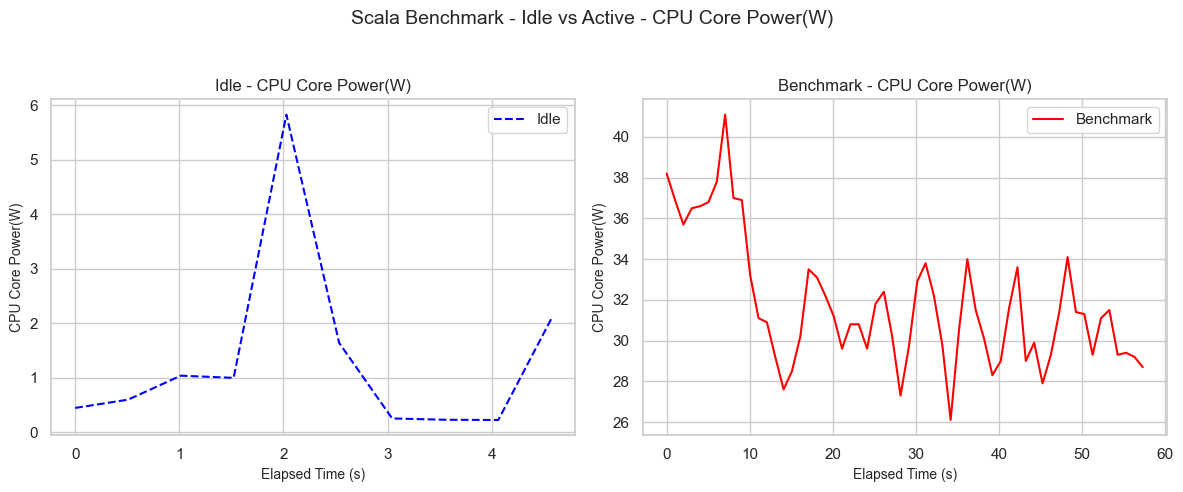

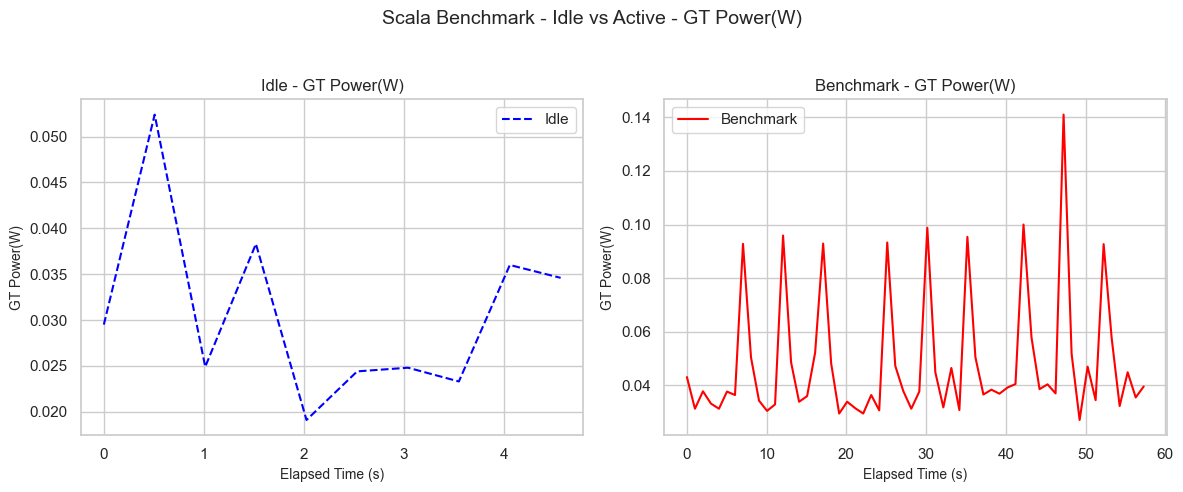

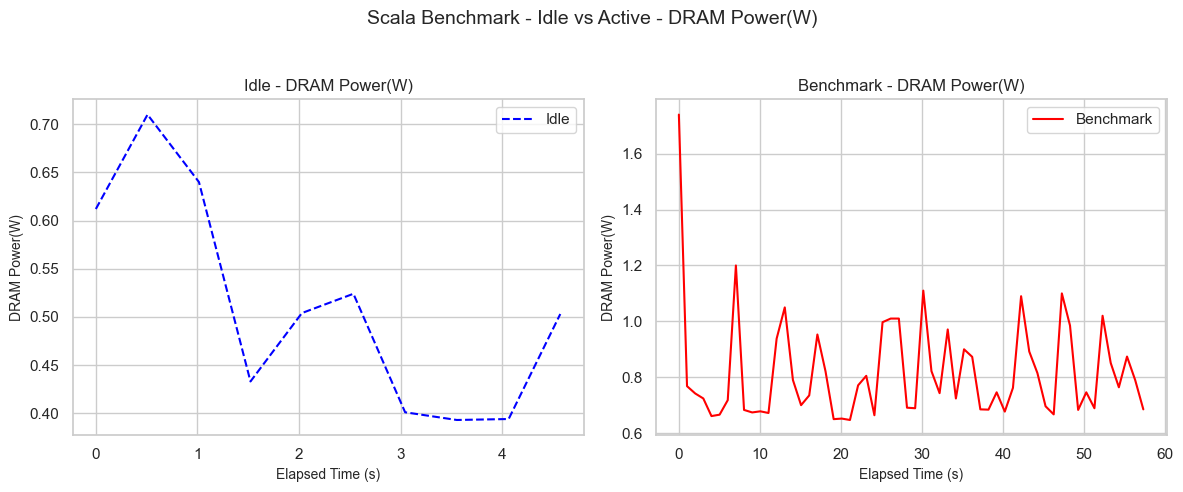

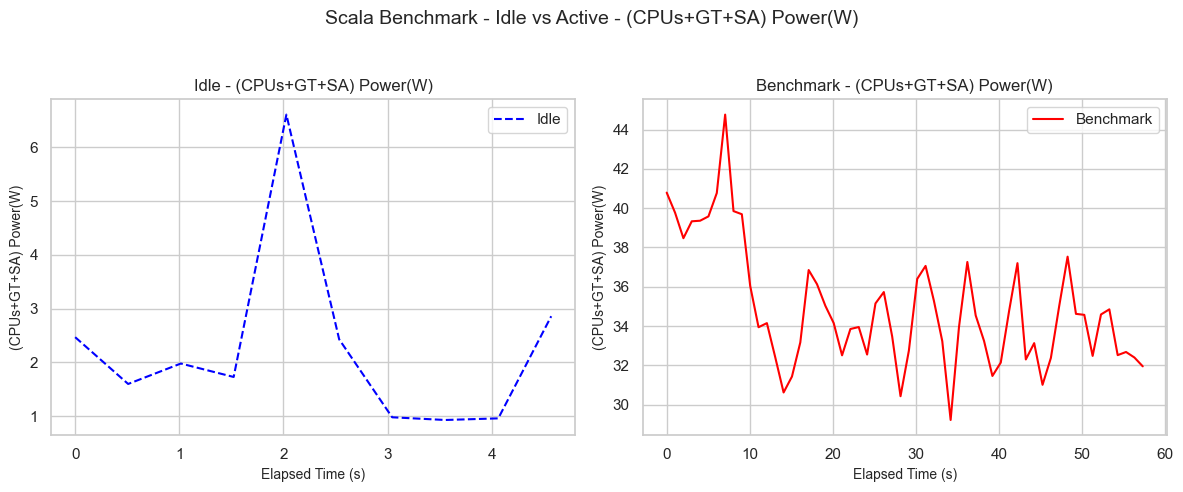

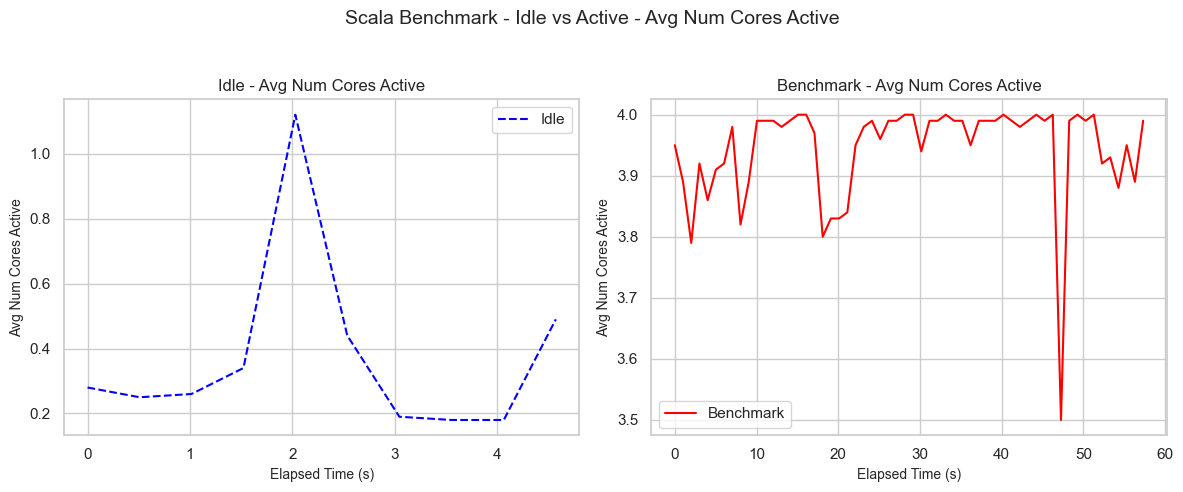

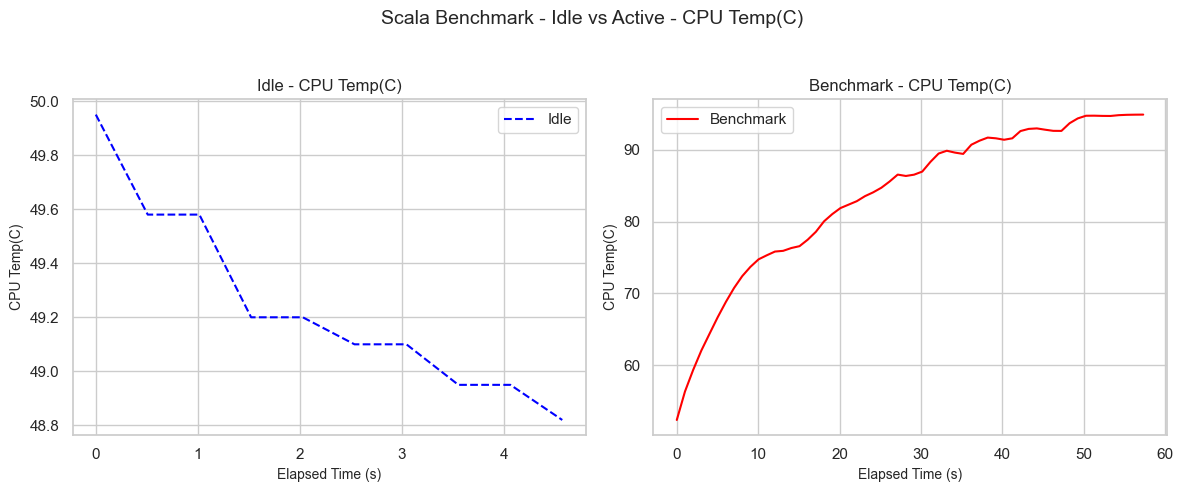

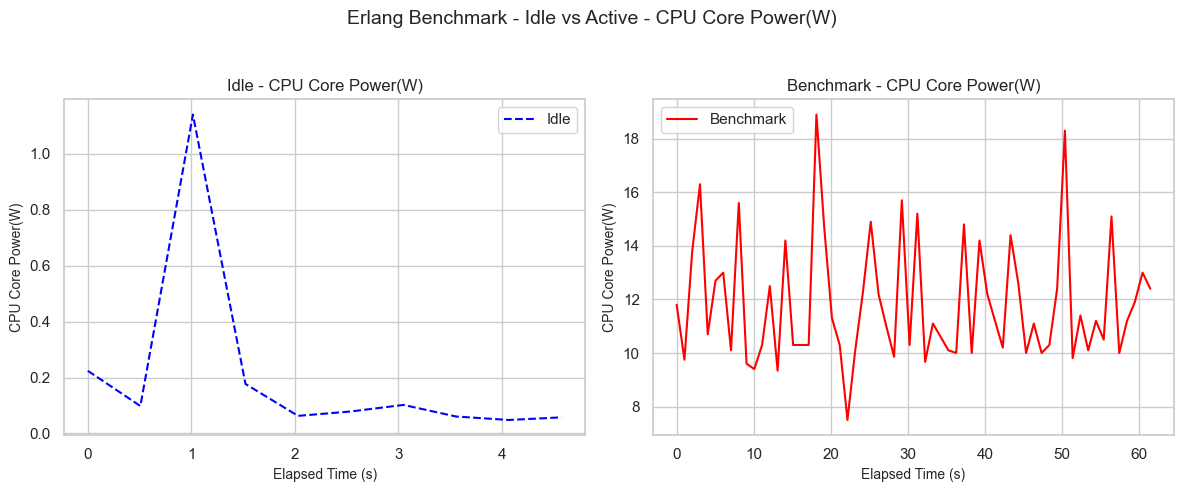

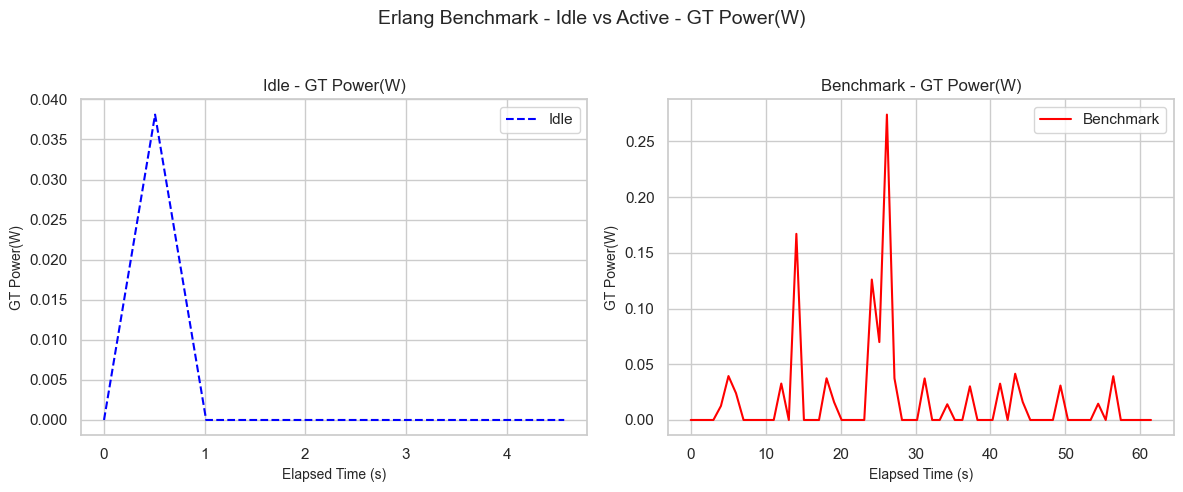

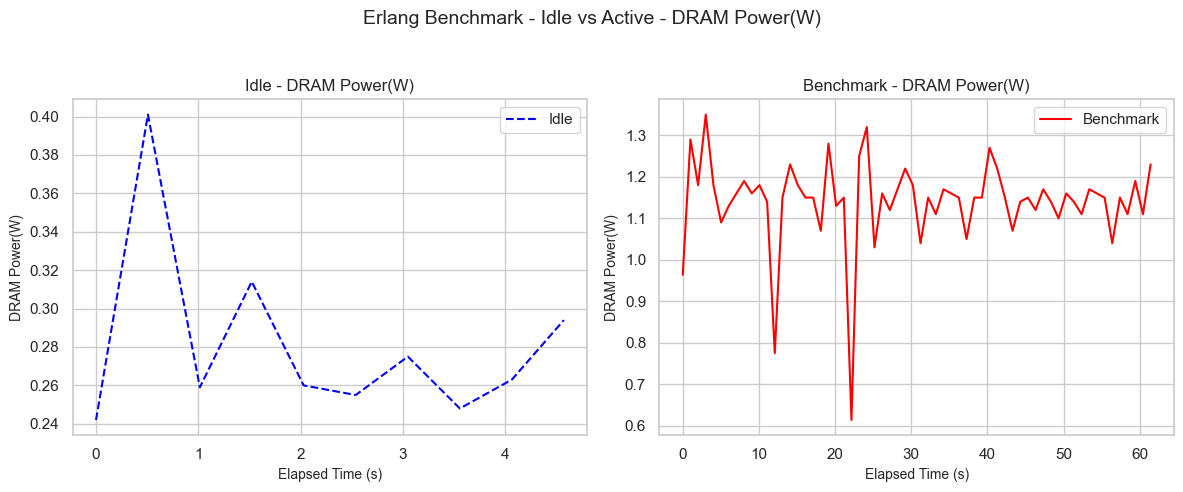

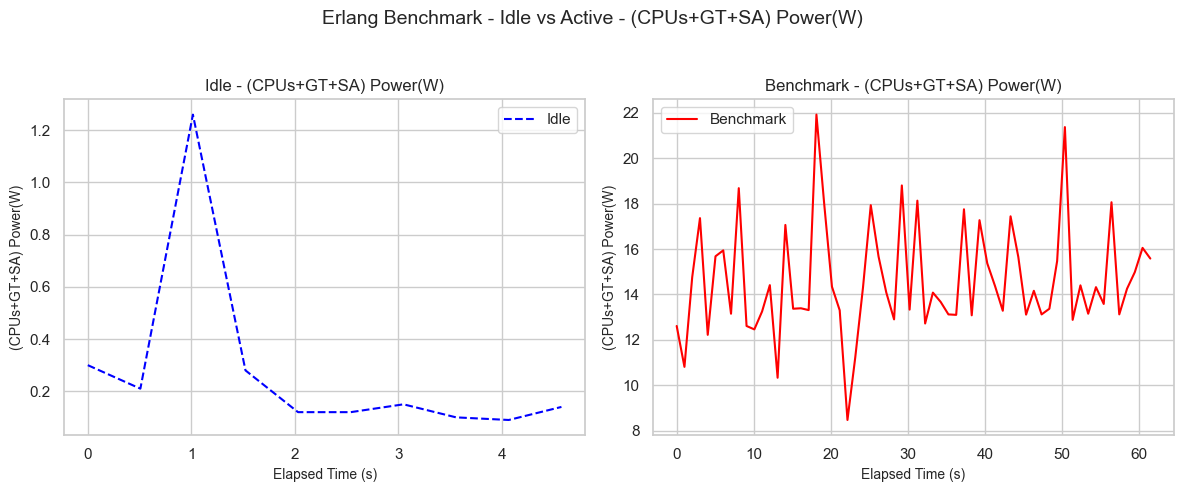

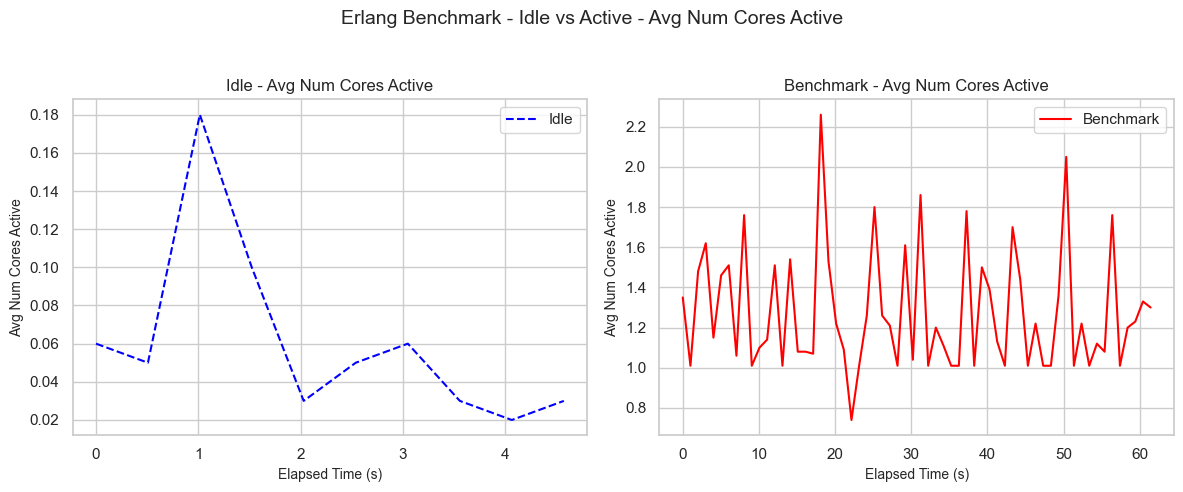

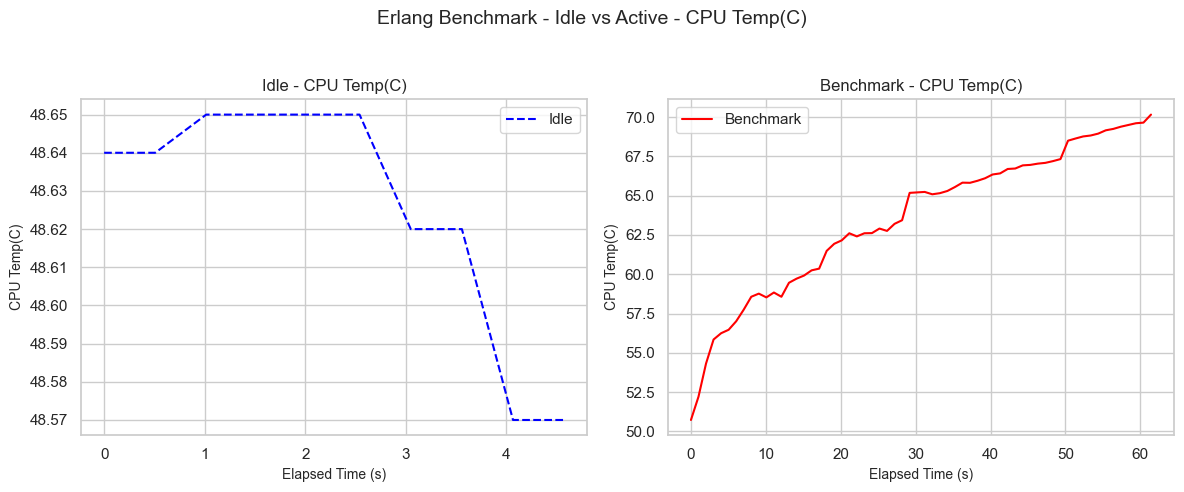

In [34]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [35]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        # ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [36]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

n = format_number_str(N)
r = format_number_str(R)
title_config_prefix = f"({n} Actors, {r} Rounds, {ITERATIONS} Iterations)"

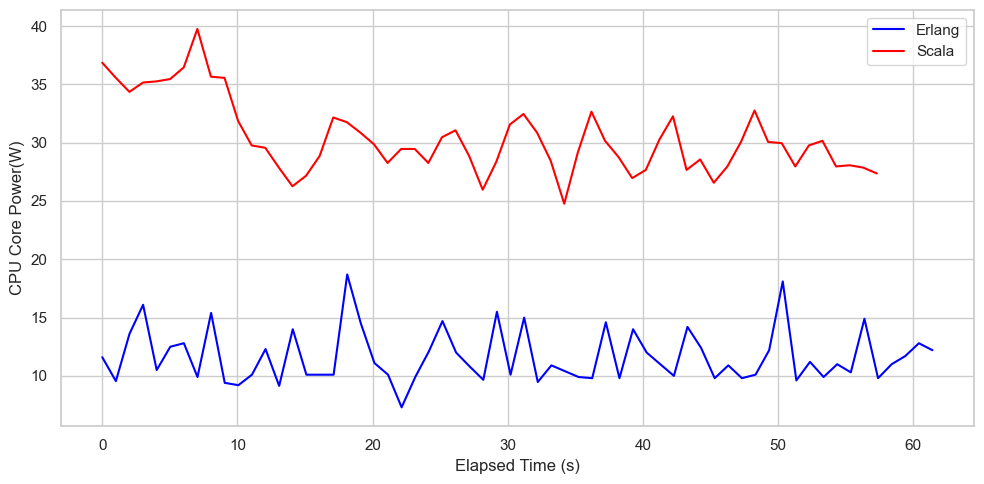

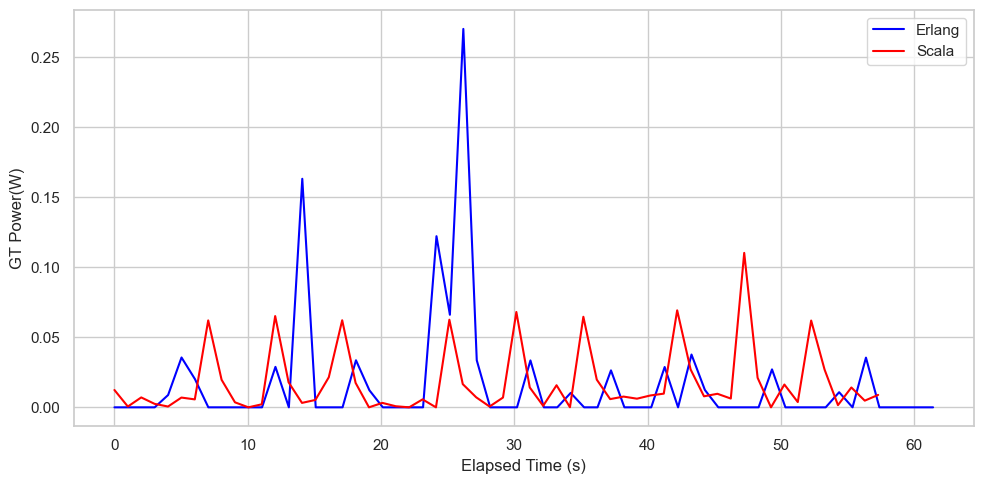

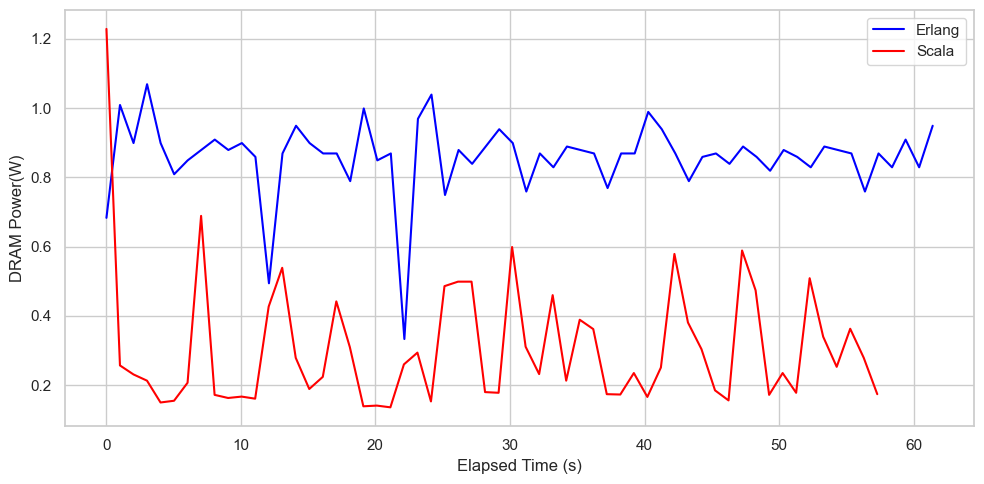

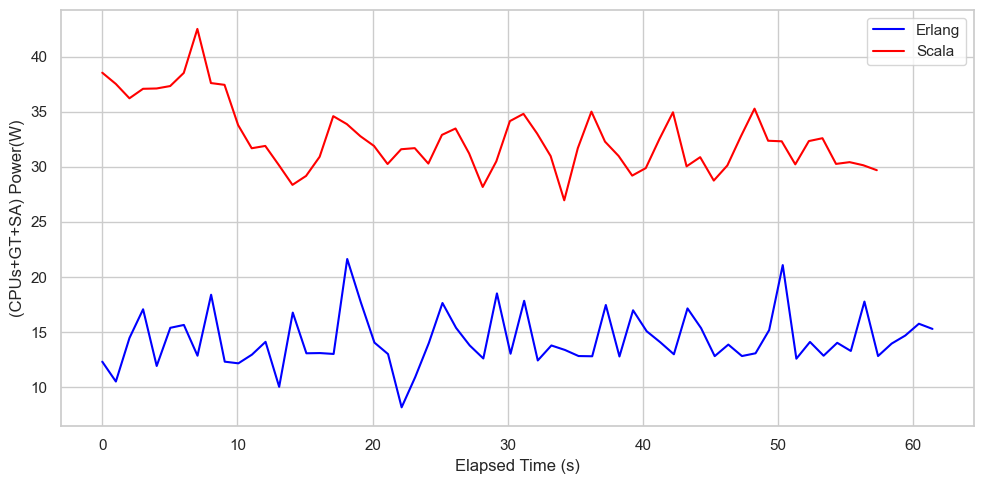

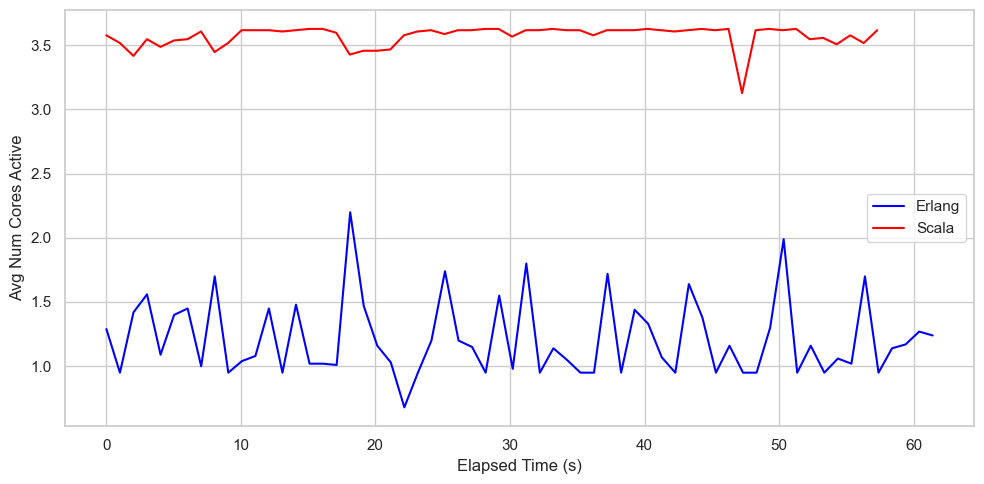

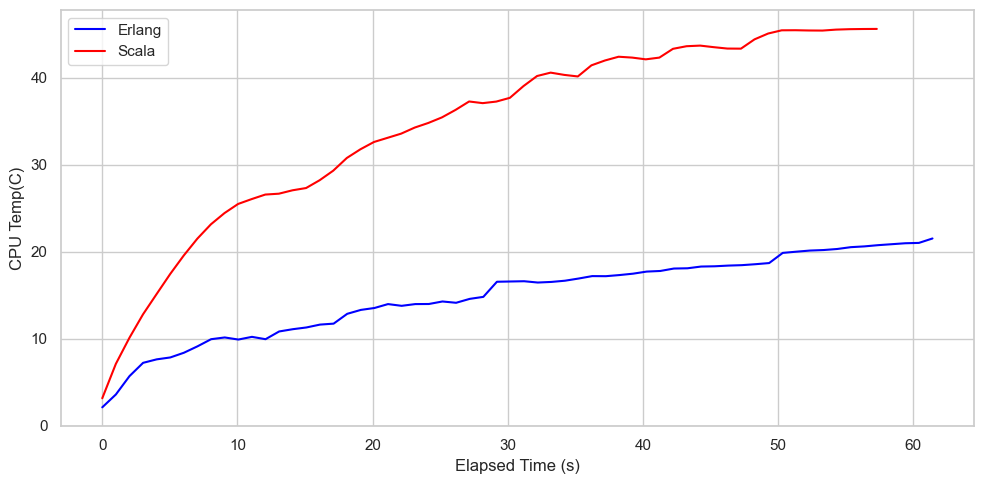

In [37]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Thread-Ring Benchmark {title_config_prefix}")


Compute Average Metrics

In [38]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [39]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Scala Idle Metrics:")
print(scala_idle_means, "\n")
print("Erlang Idle Metrics:")
print(erlang_idle_means, "\n")
print("Scala Benchmark Metrics:")
print(scala_bench_data[metrics_columns].mean(), "\n")
print("Erlang Benchmark Metrics:")
print(erlang_bench_data[metrics_columns].mean(), "\n")

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Scala Idle Metrics:
CPU Core Power(W)         1.33510
GT Power(W)               0.03073
DRAM Power(W)             0.51140
(CPUs+GT+SA) Power(W)     2.25500
CPU Temp(C)              49.24300
Avg Num Cores Active      0.37300
dtype: float64 

Erlang Idle Metrics:
CPU Core Power(W)         0.20490
GT Power(W)               0.00381
DRAM Power(W)             0.28110
(CPUs+GT+SA) Power(W)     0.27700
CPU Temp(C)              48.62600
Avg Num Cores Active      0.06100
dtype: float64 

Scala Benchmark Metrics:
CPU Core Power(W)        31.768966
GT Power(W)               0.048390
DRAM Power(W)             0.819707
(CPUs+GT+SA) Power(W)    34.904655
CPU Temp(C)              83.583966
Avg Num Cores Active      3.945000
dtype: float64 

Erlang Benchmark Metrics:
CPU Core Power(W)        11.839194
GT Power(W)               0.017631
DRAM Power(W)             1.140694
(CPUs+GT+SA) Power(W)    14.607419
CPU Temp(C)              63.570000
Avg Num Cores Active      1.275323
dtype: float64 

Net Average 

Compute Total Energy Consumption

In [40]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
# scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
# erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

scala_total_energy = (scala_net_avgs["CPU Core Power(W)"] + scala_net_avgs["DRAM Power(W)"]) * scala_total_time
erlang_total_energy = (erlang_net_avgs["CPU Core Power(W)"] + erlang_net_avgs["DRAM Power(W)"]) * erlang_total_time


# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "R": R,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy,
    "Erlang Total Time(s)": erlang_total_time,
    "Scala Total Time(s)": scala_total_time,
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["R"] == R) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "R =", R, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../../data/thread_ring/1/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 1792.6311019368968 Joules
Erlang Benchmark: 780.0071147274195 Joules
